# Rutina para todos los métodos

## Plot de $P(x)$

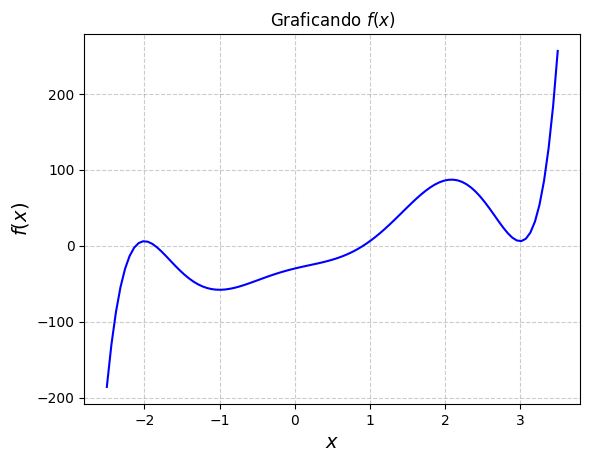

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x**7 
        - 3*x**6 
        - 8*x**5 
       + 20*x**4 
       + 15*x**3 
       - 13*x**2 
       + 24*x 
       - 30)

# Plotting f(x)
a, b, N = -2.5, 3.5, 100
x = np.linspace(a, b, N)
y = f(x)

plt.plot(x, y, color='blue')
plt.title('Graficando $f(x)$')
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$f(x)$", fontsize=14)
plt.grid(True, ls = '--', c = 'k', alpha = 0.2)

plt.show()


## Funciones para método de Bisección

In [2]:
def find_root_bis(x1, x2, delta, max_iter):
    f1, f2 = f(x1), f(x2)  
    #for _ in range(max_iter):
    count = 0
    while np.abs(x2 - x1) > delta:
        x3 = 0.5 * (x1 + x2)
        f3 = f(x3) 
        if f1 * f3 > 0:
            x1, f1 = x3, f3
        else:
            x2, f2 = x3, f3
        count += 1

    dist = x2 - x1
    print(f'Distancia entre bordes: {dist}')
    print(f'Numero de iteraciones: {count}')
    return 0.5 * (x1 + x2), dist, count

# Encontrando la raiz en el intervalo [l1, l2],
# con muestreo tamaño L, se crea una 
# función para simplificar aplicación

def root_interval(l1, l2, L, function):
    var = (l2 - l1) / L
    delta = 1e-5
    max_iter = int(np.log2(var/delta)) + 1

    for j in range(L):
        x1, x2 = l1 + j * var, l1 + (j + 1) * var
        if f(x1) * f(x2) < 0:
            root, dist, count = function(x1, x2, delta, max_iter)
            print(f'Root: {root}')
            f_root = f(root)
            print(f'f(root): {f_root}')
            print('---')

    data = [dist, count, root, f_root]
    return data
    

### Raíces en Bisección

In [3]:
first_bis = root_interval(-2.5, -2, 100, find_root_bis)
second_bis = root_interval(-2, -1.5, 100, find_root_bis)
third_bis = root_interval(0.5, 1, 100, find_root_bis)


Distancia entre bordes: 9.765625000213163e-06
Numero de iteraciones: 9
Root: -2.1159033203125004
f(root): -0.000215423452381458
---
Distancia entre bordes: 9.765625000213163e-06
Numero de iteraciones: 9
Root: -1.8587353515624998
f(root): 0.000361206260038216
---
Distancia entre bordes: 9.765624999991118e-06
Numero de iteraciones: 9
Root: 0.9113525390625
f(root): -0.0002724187482385787
---


## Funciones para Posición Falsa

In [4]:
def find_root_pf(x1, x2, delta, max_iter):
    f1, f2 = f(x1), f(x2)  
#    for _ in range(max_iter):
    count = 0
    while np.abs(x2 - x1) > delta:
        x3 = x1 - f1 * (x2 - x1) / (f2-f1)
        f3 = f(x3) 
        if f1 * f3 > 0:
            x1, f1 = x3, f3
        else:
            x2, f2 = x3, f3
        count += 1

    dist = x2 - x1
    print(f'Distancia entre bordes: {dist}')
    print(f'Numero de iteraciones: {count}')
    return 0.5 * (x1 + x2), dist, count

### Raíces en Posición Falsa

In [5]:
first_pf = root_interval(-2.5, -2, 100, find_root_pf)
second_pf = root_interval(-2, -1.5, 100, find_root_pf)
third_pf = root_interval(0.5, 1, 100, find_root_pf)


Distancia entre bordes: 1.7763568394002505e-15
Numero de iteraciones: 8
Root: -2.1159014044928797
f(root): 1.5631940186722204e-13
---
Distancia entre bordes: 6.661338147750939e-16
Numero de iteraciones: 7
Root: -1.858730558982339
f(root): 1.4210854715202004e-14
---
Distancia entre bordes: 2.220446049250313e-16
Numero de iteraciones: 6
Root: 0.9113568402145922
f(root): -7.105427357601002e-15
---


## Funciones para Secante

In [6]:
def find_root_sec(x1,x2, delta, max_iter): 
    f1 = f(x1)
    f2 = f(x2)
    count = 0
    while np.abs(x2 - x1) > delta:
        x3 = x1 - f1 * (x2 - x1) / (f2-f1)
        f3 = f(x3)
        x1, f1 = x2, f2
        x2, f2 = x3, f3
        count += 1
    
    dist  = x2 - x1
    print(f'Distancia entre bordes: {dist}')
    print(f'Numero de iteraciones: {count}')
    return 0.5 * (x1 + x2), dist, count

### Raíces en Secante

In [7]:
first_sec = root_interval(-2.5, -2, 100, find_root_sec)
second_sec = root_interval(-2, -1.5, 100, find_root_sec)
third_sec = root_interval(0.5, 1, 100, find_root_sec)

Distancia entre bordes: 9.575407533546354e-08
Numero de iteraciones: 3
Root: -2.115901452359787
f(root): -5.382318001068143e-06
---
Distancia entre bordes: 8.880201463057347e-08
Numero de iteraciones: 3
Root: -1.858730603381197
f(root): 3.346280692539949e-06
---
Distancia entre bordes: 3.828718634135697e-06
Numero de iteraciones: 2
Root: 0.911354915001461
f(root): -0.00012193596266030227
---


## Funciones para Newton-Raphson

In [8]:
def df(x):
    return (7*x**6 
        - 6*3*x**5 
        - 5*8*x**4 
       + 4*20*x**3 
       + 3*15*x**2 
       - 2*13*x 
       + 24)

def find_root_nr(x1,x2, delta, max_iter):
    f1 = f(x1)
    count = 0
    while np.abs(x2 - x1) > delta:
        x3 = x1 - f1 / df(x1)#* (x2 - x1) / (f2-f1)
        f3 = f(x3)
        x2, f2 = x1, f1
        x1, f1 = x3, f3
        count += 1

    dist = x2 - x1
    print(f'Distancia entre bordes: {dist}')
    print(f'Numero de iteraciones: {count}')
    return 0.5 * (x1 + x2), dist, count

### Raíces en Newton-Raphson

In [9]:
first_nr = root_interval(-2.5, -2, 100, find_root_nr)
second_nr = root_interval(-2, -1.5, 100, find_root_nr)
third_nr = root_interval(0.5, 1, 100, find_root_nr)

Distancia entre bordes: -4.124264618710072e-08
Numero de iteraciones: 3
Root: -2.115901425114213
f(root): -2.318732526873646e-06
---
Distancia entre bordes: 3.7067282816494185e-06
Numero de iteraciones: 2
Root: -1.8587287055869597
f(root): -0.0001396884573594548
---
Distancia entre bordes: 1.435540778693678e-06
Numero de iteraciones: 2
Root: 0.9113575579865851
f(root): 4.5461147905712096e-05
---
